## Import Libraries

In [1]:
from stitching.images import Images
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from stitching import Stitcher

## Getting Image Paths

In [2]:
def get_image_paths(relative_basepath):
    return [str(path.relative_to('.')) for path in Path(relative_basepath).rglob('*.jpeg')]

In [3]:
shelf_imgs = get_image_paths("./Baseline_Images")

## Cropping Baseline Images to Stitch Them Later
## There should be some overlapp between the images or common features to stitch them

In [4]:
for shelf_image in shelf_imgs:
    image = cv2.imread(shelf_image)
    shape = image.shape
    first_half = image[:, 0: shape[1] // 2, :]
    second_half = image[: , shape[1]// 3: , :]
    cv2.imwrite(shelf_image.replace("Baseline_Images/images", "./image_stitching").replace(".jpeg", "_1.jpeg"), first_half)
    cv2.imwrite(shelf_image.replace("Baseline_Images/images", "./image_stitching").replace(".jpeg", "_2.jpeg"), second_half)

In [5]:
image_stitching_path = "./image_stitching"

In [6]:
images_to_be_stitced = get_image_paths(image_stitching_path)

In [7]:
stitch_images = Images.of(images_to_be_stitced)
medium_stitch_imgs = list(stitch_images.resize(Images.Resolution.MEDIUM))

In [8]:
def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

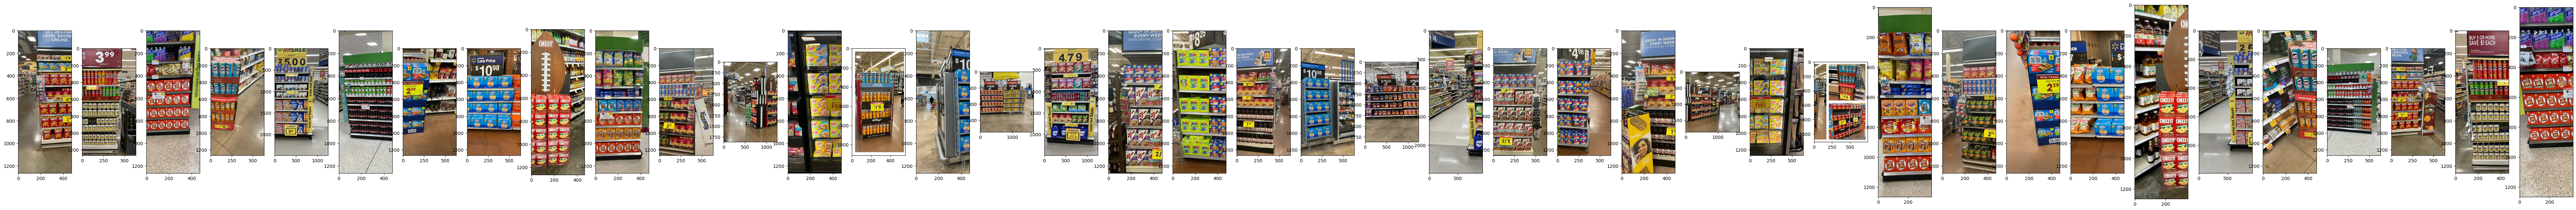

In [9]:
plot_images(medium_stitch_imgs, (100, 100))

In [10]:
images_to_be_stitced

['image_stitching/IMG_7304_1.jpeg',
 'image_stitching/IMG_6385_2.jpeg',
 'image_stitching/IMG_2288 1_2.jpeg',
 'image_stitching/IMG_6340_2.jpeg',
 'image_stitching/Image 837C9E0C-1115-4817-8D1A-5CC6A89A9854_2.jpeg',
 'image_stitching/73302DA8-4911-48F5-992A-3E94540AFDC2_IMG_3526_1.jpeg',
 'image_stitching/IMG_6374_2.jpeg',
 'image_stitching/CE7DE260-BE78-4C44-90DD-4B2AA1F491B8_IMG_1074_2.jpeg',
 'image_stitching/B87D58D3-B0BD-4E85-A2FC-0E8AACF34E5B_IMG_3441_2.jpeg',
 'image_stitching/IMG_2284_2.jpeg',
 'image_stitching/IMG_1089 1_2.jpeg',
 'image_stitching/D972B87F-4A1E-4357-9781-3D2B9FB19E28_IMG_1371_1.jpeg',
 'image_stitching/IMG_6367_1.jpeg',
 'image_stitching/IMG_7717_1.jpeg',
 'image_stitching/IMG_0996 1_1.jpeg',
 'image_stitching/IMG_0087 3_2.jpeg',
 'image_stitching/Image BDB4C656-130A-40F0-9E90-F51C0B704AA8_2.jpeg',
 'image_stitching/IMG_6341_1.jpeg',
 'image_stitching/D349A9F8-EE66-4A4B-9AB9-07662571E8B8_IMG_0972_1.jpeg',
 'image_stitching/IMG_6339_2.jpeg',
 'image_stitching/I

In [31]:
images_to_show = images_to_be_stitced[:3] + images_to_be_stitced[-3:]

In [32]:
images_to_show

['image_stitching/IMG_7304_1.jpeg',
 'image_stitching/IMG_6385_2.jpeg',
 'image_stitching/IMG_2288 1_2.jpeg',
 'image_stitching/IMG_7304_2.jpeg',
 'image_stitching/IMG_6385_1.jpeg',
 'image_stitching/IMG_2288 1_1.jpeg']

In [33]:
read_images_to_show = []
for image in images_to_show:
    read_images_to_show.append(cv2.imread(image))

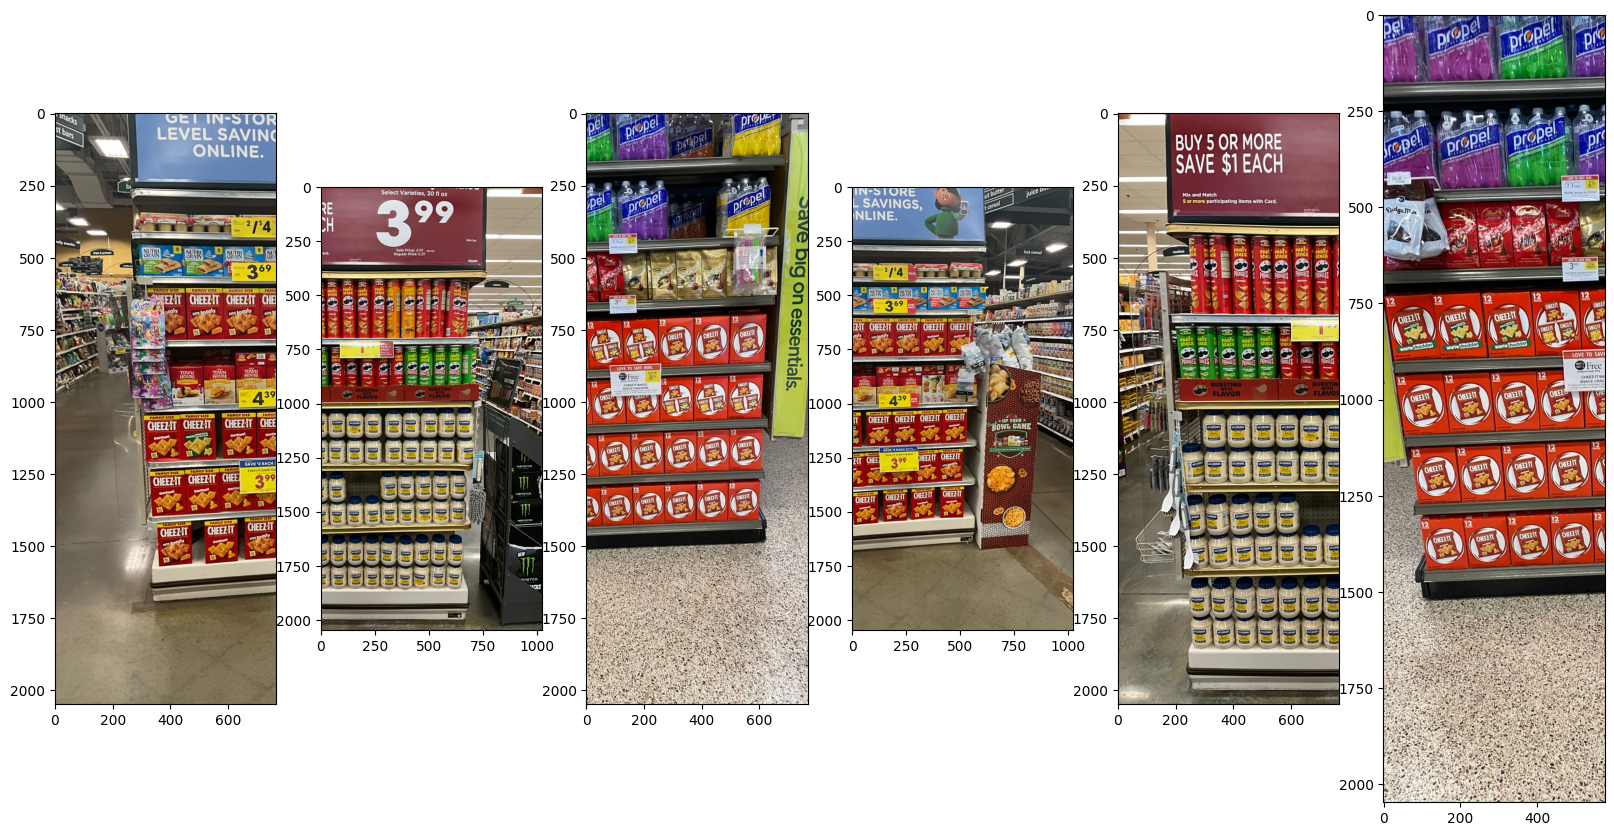

In [34]:
plot_images(read_images_to_show, (20, 20))

## Performing Verbose Stitching to obtain intermediate outputs using lower confidence threshold 

In [36]:
stitcher = Stitcher(**{"confidence_threshold": 0.8, "crop": True})
panorama = stitcher.stitch_verbose(images_to_show, verbose_dir="./image_stitching_verbose")

In [37]:
panorama

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[213, 234, 232],
        [211, 231, 229],
        [208, 227, 224],
        ...,
        [ 82,  80,  72],
        [ 74,  72,  64],
        [ 64,  62,  53]],

       [[214, 234, 232],
        [217, 236, 234],
        [214, 233, 231],
        ...,
        [ 74,  71,  63],
        [ 72,  69,  62],
        [ 67,  67,  57]],

       ...,

       [[108, 132, 143],
        [115, 139, 150],
        [107, 131, 143],
        ...,
        [ 92, 118, 131],
        [ 96, 122, 134],
        [100, 126, 139]],

       [[105, 129, 140],
        [114, 138, 150],
        [108, 132, 144],
        ...,
        [101, 127, 140],
        [100, 126, 139],
        [ 98, 124, 137]],

       [[108, 132, 144],
        [110, 133, 145],
        [118, 142, 154],
        ...,
        [105, 131, 144],
        [104, 130, 143],
        [ 99, 125, 138]]

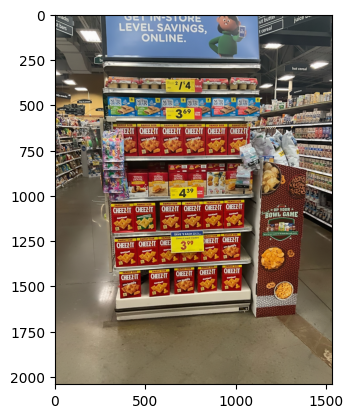

In [38]:
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.show()